In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("data/Iris.csv")

In [4]:
for i in data.columns:
  print(i,data[i].nunique())

Id 150
SepalLengthCm 35
SepalWidthCm 23
PetalLengthCm 43
PetalWidthCm 22
Species 3


In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
data.shape

(150, 6)

In [8]:
data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [9]:
data.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
numcols=data.dtypes[(data.dtypes=='float64')].index

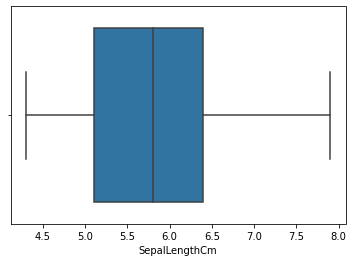

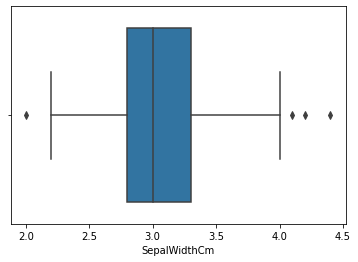

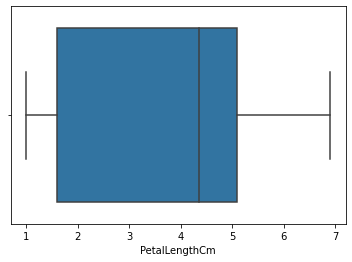

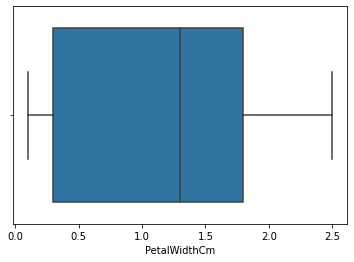

In [12]:
for x in numcols:
    sns.boxplot(data[x])
    plt.show()

In [13]:
for x in numcols:
    desc=data[x].describe()
    IQR=desc['75%']-desc['25%']
    ul=desc['75%']+1.5*IQR
    ll=desc['25%']-1.5*IQR
    data[x][data[x]>ul]=ul
    data[x][data[x]<ll]=ll

In [14]:
X=data

In [15]:
X=data.drop(['Id','Species'],axis=1)

In [16]:
X=pd.get_dummies(X)

In [17]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
X.shape

(150, 4)

k: 1 wcss: 679.4767333333333
k: 2 wcss: 151.3707284574986
k: 3 wcss: 78.01971239388794
k: 4 wcss: 56.40796250000001
k: 5 wcss: 45.629232051282045
k: 6 wcss: 38.29706675337547
k: 7 wcss: 33.68264210950079
k: 8 wcss: 29.351147580881292
k: 9 wcss: 27.453460892569595


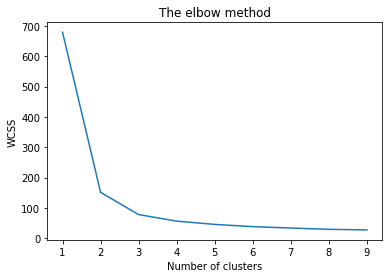

In [19]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',max_iter=300,n_init =10,random_state = 0 )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print('k:',i,"wcss:",kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The elbow method')
plt.xlabel("Number of clusters")
plt.ylabel('WCSS')
plt.show()

In [27]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [28]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [29]:
data['Cluster']=y_kmeans

In [30]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
